In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_roc_curve
from sklearn.decomposition import PCA 
from sklearn.model_selection import learning_curve

%matplotlib inline

In [2]:
df = pd.read_csv('part_1.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y_class
0,2.7,-4.55,6.4,3.7,5,1,0,-15.55,0
1,-2.2,0.05,9.7,19.5,-56,0,1,-16.45,1
2,7.2,3.05,-9.8,-13.5,35,1,1,20.75,0
3,6.7,1.30,9.7,22.0,-7,1,1,14.00,0
4,7.1,-4.10,-6.8,-21.8,-45,0,1,-1.00,0


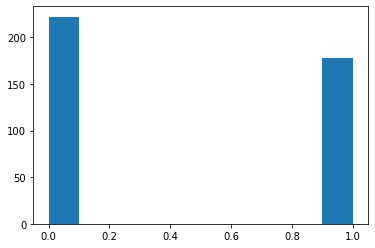

Class 0:  222  Class 1:  178


In [3]:
counts = df['y_class'].value_counts()
plt.hist(df['y_class'])
plt.show()
print('Class 0: ',counts[0], ' Class 1: ', counts[1])

In [4]:
data = 0
if 'y_class' in df.columns:
    labels = df.y_class
    data = df.drop(['y_class'], axis=1)
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8
0,2.7,-4.55,6.4,3.7,5,1,0,-15.55
1,-2.2,0.05,9.7,19.5,-56,0,1,-16.45
2,7.2,3.05,-9.8,-13.5,35,1,1,20.75
3,6.7,1.30,9.7,22.0,-7,1,1,14.00
4,7.1,-4.10,-6.8,-21.8,-45,0,1,-1.00


In [5]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

### Try 2D visualization using PCA

In [ ]:
df_pos = df[df['y_class'] == 1]
df_neg = df[df['y_class'] == 0]
df_pos = df_pos.drop(['y_class'], axis=1)
df_neg = df_neg.drop(['y_class'], axis=1)
pca = PCA(n_components=2)
x_pos = pca.fit_transform(df_pos)
x_neg = pca.fit_transform(df_neg)

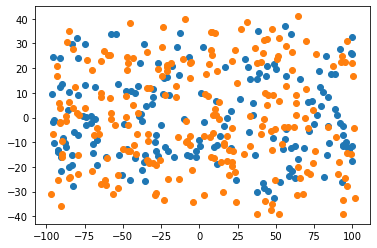

In [7]:
plt.scatter(x_pos[:,0], x_pos[:,1])
plt.scatter(x_neg[:,0], x_neg[:,1])

##### Data Exploration: Range of values using histogram

(array([197.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 203.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

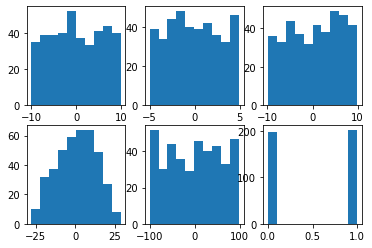

In [8]:
fig, axs = plt.subplots(2,3)
axs[0][0].hist(df['x1'])
axs[0][1].hist(df['x2'])
axs[0][2].hist(df['x3'])
axs[1][0].hist(df['x4'])
axs[1][1].hist(df['x5'])
axs[1][2].hist(df['x6'])

### Logistic Regression

In [9]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

Score: 0.5


array([[0.76      , 0.72      , 0.72      , 0.72      , 0.72      ],
       [0.62650602, 0.68674699, 0.6746988 , 0.6746988 , 0.6746988 ],
       [0.61428571, 0.62857143, 0.65      , 0.65714286, 0.65714286],
       [0.60606061, 0.64141414, 0.63131313, 0.60606061, 0.6010101 ],
       [0.609375  , 0.640625  , 0.59765625, 0.609375  , 0.59375   ]])

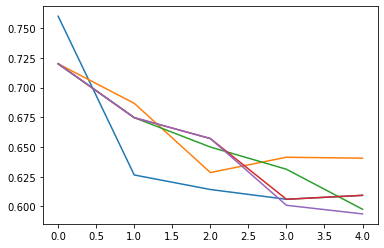

In [10]:
lr.predict(x_test)
print('Score:', lr.score(x_test, y_test))
train_sizes, train_scores, test_scores = learning_curve(lr, x_train, y_train, cv=5)
plt.plot(train_scores)
train_scores

### K Nearest Neighbours

In [11]:
# with 2 neighbours
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
knn.score(x_test, y_test)

0.6

### Decision Tree Classifier

In [13]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
dt.score(x_test, y_test)

0.7875

### Support Vector Machine

In [15]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

Score: 0.5875


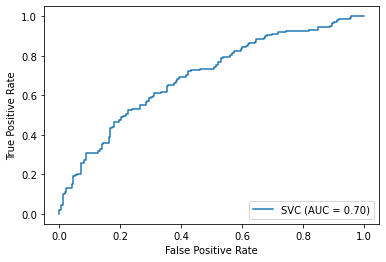

In [16]:
print('Score:', svm.score(x_test, y_test))
svc_disp = plot_roc_curve(svm, x_train, y_train)

### Random Forest Classifier

In [17]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
rf.score(x_test, y_test)

0.85

### Naive Bayes Classifier

In [19]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [20]:
nb.score(x_test, y_test)

0.575

# Deep Learning

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.nn import relu, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import load_model

In [22]:
class myCallback(Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.85):
            print("\nReached 85% accuracy so cancelling training!")
            self.model.stop_training = True

In [23]:
model = Sequential([
    Dense(6, activation=relu),
    Dense(1, activation=sigmoid)
])

model.compile(optimizer=Adam(learning_rate=0.05),
             loss=BinaryCrossentropy(),
             metrics=['accuracy']
             )

In [24]:
callbacks = myCallback()

model.fit(x_train, y_train, epochs=150, batch_size=32, 
         validation_data=(x_test, y_test),
         callbacks=[callbacks])

Epoch 1/150

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

10/10 [==============================] - 0s 17ms/step - loss: 2.5354 - accuracy: 0.5656 - val_loss: 0.9550 - val_accuracy: 0.5750
Epoch 2/150
10/10 [==============================] - 0s 5ms/step - loss: 0.8770 - accuracy: 0.5969 - val_loss: 0.5767 - val_accuracy: 0.6750
Epoch 3/150
10/10 [==============================] - 0s 5ms/step - loss: 0.6845 - accuracy: 0.5562 - val_loss: 0.6473 - val_accuracy: 0.5375
Epoch 4/150
10/10 [==============================] - 0s 7ms/step - loss: 0.6562 - ac

In [25]:
model.save('model.h5')

In [29]:
n_model = load_model('model.h5')

In [30]:
n_model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.4238 - accuracy: 0.8375


[0.42378097772598267, 0.8374999761581421]